In [1]:
import pandas as pd
import numpy as npy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('events.csv',low_memory=False)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [4]:
df.loc[df['event']=='brand listing'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98635 entries, 12 to 1011165
Data columns (total 23 columns):
timestamp                   98635 non-null object
event                       98635 non-null object
person                      98635 non-null object
url                         0 non-null object
sku                         0 non-null object
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        98324 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 non-null objec

In [5]:
mdl = df['model']
stg = df['storage']
clr = df['color']
cnd = df['condition']
spc = ' '
df['nombreproducto'] = mdl+spc+stg+spc+clr+spc+cnd

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 24 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [7]:
df['timestamp'].head().to_frame()

,timestamp
0,2018-05-31 23:38:05
1,2018-05-31 23:38:05
2,2018-05-31 23:38:09
3,2018-05-31 23:38:40
4,2018-05-29 13:29:25


In [8]:
df['time'] = pd.to_datetime(df['timestamp'])

In [9]:
df['time'].head().to_frame()

,time
0,2018-05-31 23:38:05
1,2018-05-31 23:38:05
2,2018-05-31 23:38:09
3,2018-05-31 23:38:40
4,2018-05-29 13:29:25


In [11]:
df['month'] = df['time'].dt.month

In [12]:
df['month'].value_counts()

5    474949
6    281882
4    130008
3     77293
2     27886
1     19270
Name: month, dtype: int64

In [13]:
df['year'] = df['time'].dt.year

In [14]:
df['hour'] = df['time'].dt.hour

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 28 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [16]:
df['year'].value_counts()

2018    1011288
Name: year, dtype: int64

In [17]:
df_conversions = df[df['event']=='conversion']

In [18]:
df_conversions['model'].value_counts().head()

Samsung Galaxy J5         88
iPhone 5s                 84
iPhone 6                  71
Samsung Galaxy S6 Flat    39
iPhone 6S                 37
Name: model, dtype: int64

In [19]:
df_conversions.isnull().any()

timestamp                   False
event                       False
person                      False
url                          True
sku                         False
model                       False
condition                   False
storage                     False
color                       False
skus                         True
search_term                  True
staticpage                   True
campaign_source              True
search_engine                True
channel                      True
new_vs_returning             True
city                         True
region                       True
country                      True
device_type                  True
screen_resolution            True
operating_system_version     True
browser_version              True
nombreproducto              False
time                        False
month                       False
year                        False
hour                        False
dtype: bool

In [20]:
print(df_conversions.shape)
print(df_conversions.isnull().sum())

(1172, 28)
timestamp                      0
event                          0
person                         0
url                         1172
sku                            0
model                          0
condition                      0
storage                        0
color                          0
skus                        1172
search_term                 1172
staticpage                  1172
campaign_source             1172
search_engine               1172
channel                     1172
new_vs_returning            1172
city                        1172
region                      1172
country                     1172
device_type                 1172
screen_resolution           1172
operating_system_version    1172
browser_version             1172
nombreproducto                 0
time                           0
month                          0
year                           0
hour                           0
dtype: int64


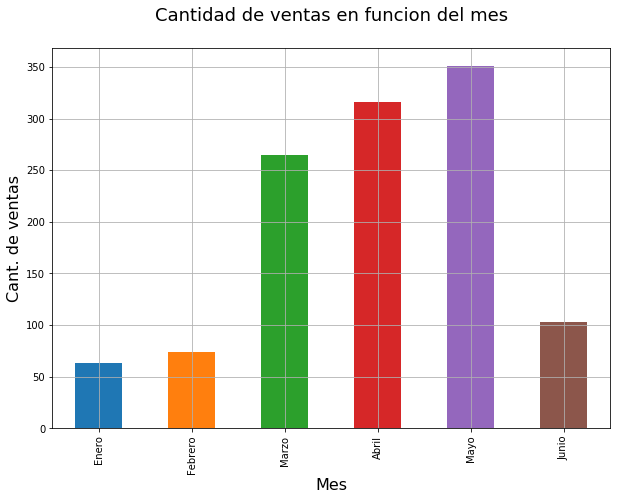

In [29]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7
plt.rcParams["figure.figsize"] = fig_size

plot = df_conversions['month'].value_counts().sort_index().plot.bar()
plot.set_title('Cantidad de ventas en funcion del mes\n',size=18)
plot.set_xlabel('Mes',size=16)
plot.set_ylabel('Cant. de ventas',size=16)
plt.xticks([0,1,2,3,4,5],['Enero','Febrero','Marzo','Abril','Mayo','Junio'])
plot.grid(True)
plot

In [22]:
df_viewed = df[df['event']=='viewed product']

# Productos más vistos

In [23]:
df_viewed['nombreproducto'].value_counts().head().to_frame()

,nombreproducto
iPhone 6 16GB Cinza espacial Bom,4163
iPhone 6 16GB Prateado Bom,3574
iPhone 6 16GB Dourado Bom,3566
Samsung Galaxy S7 32GB Preto Bom,3421
Samsung Galaxy S8 64GB Preto Bom,2866


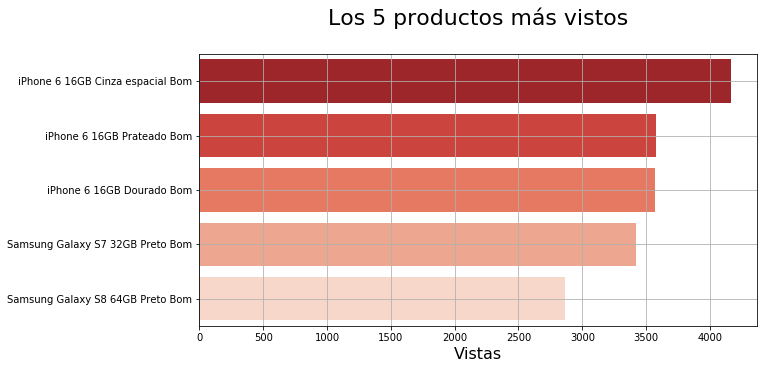

In [36]:
vistos = df_viewed['nombreproducto'].value_counts().head()
f,a = plt.subplots(figsize=(10,5))
g = sns.barplot(data=vistos.to_frame(),y=vistos.index,x='nombreproducto',palette='Reds_r')
plt.title('Los 5 productos más vistos\n',size=22)
plt.xlabel('Vistas',size=16)
plt.grid(True)

# Productos más comprados

In [25]:
df_conversions['nombreproducto'].value_counts().head().to_frame()

,nombreproducto
Samsung Galaxy J5 16GB Dourado Bom,30
Samsung Galaxy J5 16GB Dourado Muito Bom,18
Motorola Moto G3 4G 16GB Preto Bom,17
iPhone 5s 16GB Cinza espacial Bom,16
Samsung Galaxy S6 Flat 32GB Dourado Bom,14


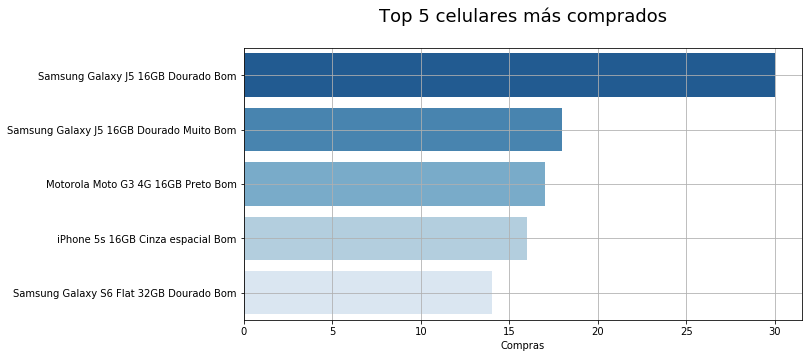

In [35]:
comprados = df_conversions['nombreproducto'].value_counts().head().to_frame()
f,a = plt.subplots(figsize=(10,5))
h = sns.barplot(ax=a,data=comprados,y=comprados.index,x='nombreproducto',palette='Blues_r')
h.set_title('Top 5 celulares más comprados\n',size=18)
h.set_xlabel('Compras')
plt.grid(True)

In [27]:
#verificacion de que cada sku tiene un unico 'model+storage+color+condition'
porsku = df.groupby('sku')
porsku.agg({'nombreproducto':'nunique'})['nombreproducto'].value_counts().to_frame()

,nombreproducto
1,3573
0,1


# Productos comprados por más personas

In [28]:
ventas_porsku = df_conversions.groupby('nombreproducto')
ventas_unicas = ventas_porsku.agg({'person':'nunique'}).sort_values('person',ascending=False).head().reset_index()
ventas_unicas.index = ventas_unicas.index + 1
ventas_unicas.columns = ['Producto','Personas que compraron']
ventas_unicas

,Producto,Personas que compraron
1,Samsung Galaxy J5 16GB Dourado Bom,18
2,Samsung Galaxy J5 16GB Dourado Muito Bom,12
3,Samsung Galaxy J5 16GB Preto Bom,10
4,Samsung Galaxy J5 16GB Branco Bom,9
5,iPhone 5s 16GB Cinza espacial Muito Bom,8


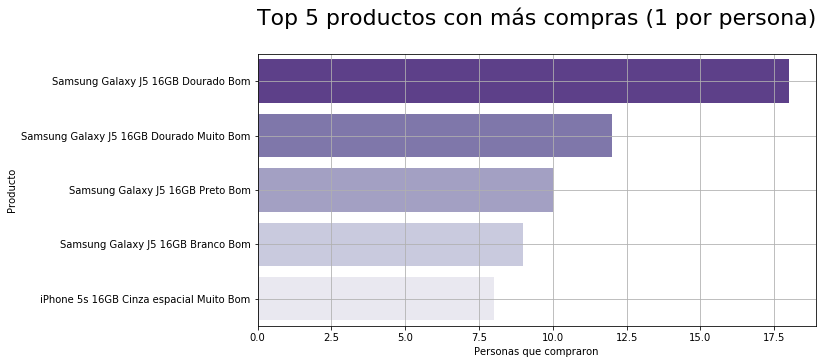

In [34]:
f,a = plt.subplots(figsize=(10,5))
i = sns.barplot(ax=a,data=ventas_unicas,y=ventas_unicas.Producto,x=ventas_unicas['Personas que compraron'],palette='Purples_r')
i.set_title('Top 5 productos con más compras (1 por persona)\n',size=22)
plt.grid(True)

In [30]:
df_ads = df.loc[df['event']=='ad campaign hit']

In [31]:
df_ads.count()

timestamp                   82827
event                       82827
person                      82827
url                         82756
sku                             0
model                           0
condition                       0
storage                         0
color                           0
skus                            0
search_term                     0
staticpage                      0
campaign_source             82796
search_engine                   0
channel                         0
new_vs_returning                0
city                            0
region                          0
country                         0
device_type                     0
screen_resolution               0
operating_system_version        0
browser_version                 0
nombreproducto                  0
time                        82827
month                       82827
year                        82827
hour                        82827
dtype: int64

# Celulares más vendidos por mes

In [32]:
def values(x):
    return x.value_counts().values[0]
def index(x):
    return x.value_counts().index[0]

g = df_conversions.groupby('month').agg({'nombreproducto': [index,values]})
g.columns = ['Modelo','Ventas']
g.index.names = ['Mes']
g

,Modelo,Ventas
Mes,,
1,Samsung Galaxy S6 Flat 32GB Dourado Bom,7
2,Samsung Galaxy Note 4 32GB Branco Muito Bom,8
3,Motorola Moto G3 4G 16GB Preto Bom,13
4,iPhone 5s 16GB Cinza espacial Bom,6
5,Samsung Galaxy J5 16GB Dourado Bom,17
6,Samsung Galaxy Note 3 Neo Duos 16GB Branco Bom,5


Text(0.5, 1.0, 'Top 7 modelos mas vendidos\n')

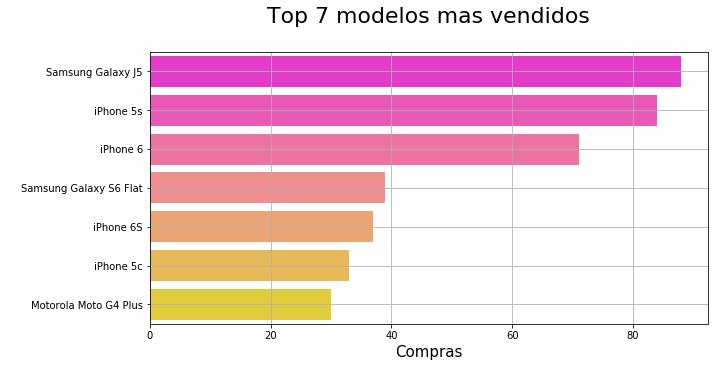

In [37]:
x=df_conversions['model'].value_counts()
fig,ax=plt.subplots(figsize=(10,5))
p = x.head(7).to_frame().reset_index()
sns.barplot(data=p,x='model',y='index',palette="spring")
plt.grid(True)
plt.xlabel('Compras',size=15)
plt.ylabel(' ')
plt.title('Top 7 modelos mas vendidos\n',size=22)
